In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

In [4]:
df = pd.read_csv('imputedWQ.csv', parse_dates=True, header=0, index_col=0)

In [3]:
# create Series object
Tp = df['Tp']
Cl = df['Cl']
pH = df['pH']
Redox = df['Redox']
Leit = df['Leit']
Trueb=df['Trueb']
Cl2 = df['Cl_2']
Fm = df['Fm']
Fm_2 = df['Fm_2']

The moving average can be calculated using .rolling().mean(). 
It helps us to remove the effect of the "noise" from the dataset. 
The larger the moving window, the smoother and less random the graph will be, but at the expense of accuracy.


Why are they used? _Moving averages come in various forms, but their underlying purpose remains the same: to help technical traders track the trends of financial assets by smoothing out the day-to-day price fluctuations, or noise._ (adapt it)

Purpose of using moving average(sliding average, rolling mean) are different: http://www.statisticshowto.com/moving-average/
But our purpose mainly consists of filtering out noisy samples that could be just an anomaly and not a real event.

Here is another link that the start is useful for our case: https://afit-r.github.io/ts_moving_averages

In [4]:
# I remove here the EVENT column cause we don't need to include it in the mean average
cols = list(df.columns.values)
cols = cols[:-1]

In [5]:
print(cols)

['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']


In [6]:
#Here we calculate the moving average with a window of 10 minutes(10 samples).
df[cols] = df[cols].rolling(window=10).mean()

In [6]:
# as we can see the first 10 values contain NaN - we could that by using the min_periods argument of the rolling mean
# described here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html
# but I think that we could just ignore the first 10 values and start from 10-th
df.head(20)

,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
Time,,,,,,,,,,
2016-08-03 09:49:00,6.5,0.17,8.36,749.0,211.0,11.0,118.00,1677.0,695.0,False
2016-08-03 09:50:00,6.5,0.17,8.36,749.0,211.0,11.0,118.00,1561.0,696.0,False
2016-08-03 09:51:00,6.5,0.17,8.35,749.0,211.0,11.0,117.00,1581.0,696.0,False
2016-08-03 09:52:00,6.5,0.17,8.35,749.0,211.0,11.0,118.00,1579.0,693.0,False
2016-08-03 09:53:00,6.5,0.17,8.35,749.0,211.0,11.0,118.00,1567.0,689.0,False
2016-08-03 09:54:00,6.5,0.17,8.35,749.0,211.0,12.0,118.00,1553.0,689.0,False
2016-08-03 09:55:00,6.5,0.17,8.35,749.0,211.0,11.0,118.00,1552.0,695.0,False
2016-08-03 09:56:00,6.5,0.17,8.35,749.0,211.0,11.0,118.00,1603.0,694.0,False
2016-08-03 09:57:00,6.5,0.17,8.34,749.0,211.0,11.0,0.12,1559.0,700.0,False


In [7]:
# here is just a graph that shows how rolling mean and std look visually

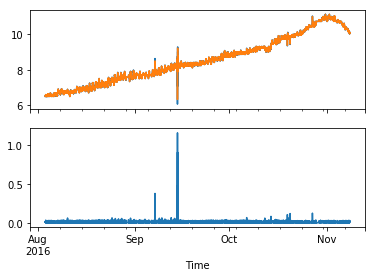

In [35]:
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)
df['TpMA']=Tp.rolling(window=10).mean()
df['TpSTD']=Tp.rolling(window=10).std()

Tp.plot(ax=ax1)
df['TpMA'].plot(ax=ax1)
df['TpSTD'].plot(ax=ax2)

plt.show()

There are two ways how rolling means can be applied in our dataset, heteregenous windows - one that allows inclusion of different samples consisting of events and no-events samples and homogenous windows - where it is restricted that windows contain only samples of one type: event or no-event instances.
We have gone with the first approach, since we use 1-step moving average in the case of an event happening on the last sample added to the window, is it trivial that any form of contamination couldn't be detected immediately by the sensors because it would need some time for the contamination to spread and in this way by allowing heterogenous windows we try to include this gradual change in values till the moment that event was finally reported.